In [5]:
#conda install -c conda-forge shapely

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [8]:
from shapely.geometry.polygon import Polygon
from shapely.geometry import Point
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

%matplotlib inline

In [37]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37203,33,NASHVILLE,93532.890729543782,120334624.37817383,"MULTIPOLYGON (((-86.78734 36.16688, -86.78711 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
4,37246,57,NASHVILLE,2247.4521491892065,315078.17651367187,"MULTIPOLYGON (((-86.79052 36.15846, -86.79107 ..."


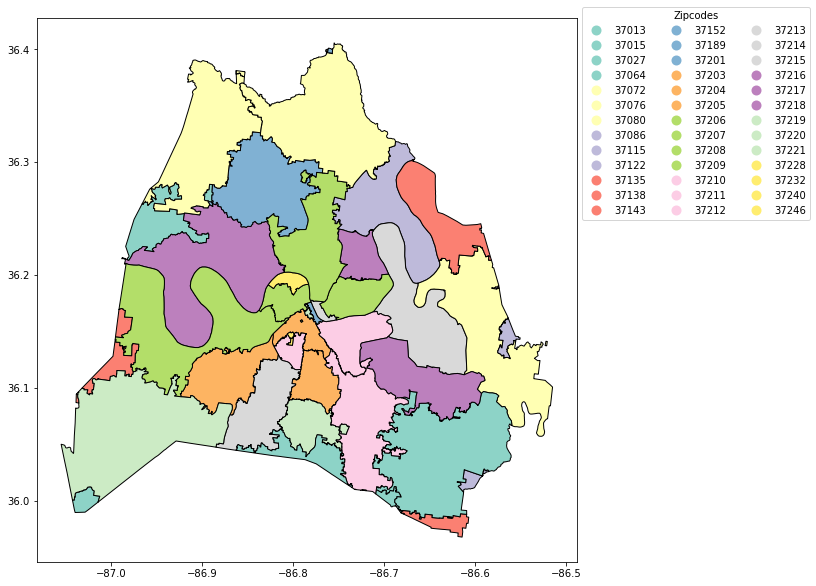

In [38]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 3}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set3')
plt.show()

In [9]:
promise_zones = gpd.read_file('../data/MDHA_Promise_Zones/Export_Output_5.shp')
print(promise_zones.crs)
promise_zones.head()

epsg:2274


,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((1743366.812 678044.543, 1743367.698 ..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((1738690.545 661791.347, 1738733.644 ..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((1759602.544 668309.889, 1759640.155 ..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((1747799.003 654974.612, 1747821.293 ..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((1737013.744 692634.639, 1737122.605 ..."


In [10]:
type(promise_zones)

geopandas.geodataframe.GeoDataFrame

In [11]:
promise_zones = promise_zones.to_crs('EPSG:4326')

In [12]:
print(promise_zones.crs)

EPSG:4326


In [13]:
type(promise_zones)

geopandas.geodataframe.GeoDataFrame

<AxesSubplot:>

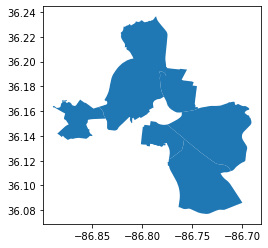

In [14]:
promise_zones.plot()

In [15]:
may = pd.read_pickle('../data/may.pkl')
june = pd.read_pickle('../data/june.pkl')
july = pd.read_pickle('../data/july.pkl')

In [16]:
may.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,93.0,0
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,35.0,0
2,2019-05-01 00:01:41.247,36.144752,-86.806293,PoweredMEJEH,90.0,0
3,2019-05-01 00:01:41.247,36.162056,-86.774688,Powered1A7TC,88.0,0
4,2019-05-01 00:01:41.247,36.150973,-86.783109,Powered2TYEF,98.0,0


In [17]:
may.dtypes

pubdatetime    datetime64[ns]
latitude              float64
longitude             float64
sumdid                 object
chargelevel           float64
companyname             int64
dtype: object

In [18]:
may['day'] = may['pubdatetime'].dt.day
may['hour'] = may['pubdatetime'].dt.hour
may['minute'] = may['pubdatetime'].dt.minute


may.head(3)
may.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute
20292498,2019-05-31 23:59:42,36.1639,-86.7823,Poweredbb60ef04-c719-597f-805f-20978964fd8c,49.0,5,31,23,59
20292499,2019-05-31 23:59:42,36.1606,-86.7768,Powered9f5743ed-7f81-539b-9e37-6503d54445d3,68.0,5,31,23,59
20292500,2019-05-31 23:59:42,36.1606,-86.7769,Powered5744d1db-3bbe-55e5-9a23-a93828ba54fc,53.0,5,31,23,59
20292501,2019-05-31 23:59:42,36.1624,-86.7745,Poweredad1d6d3b-162a-5bec-bffd-cac4ac8dee1c,42.0,5,31,23,59
20292502,2019-05-31 23:59:42,36.1519,-86.7985,Powered8505008e-97c9-5003-8975-2ea6b2634fa0,76.0,5,31,23,59


In [39]:
#june date/time/hour
june['dates'] = pd.to_datetime(june['pubdatetime']).dt.date
june['times'] = pd.to_datetime(june['pubdatetime']).dt.time
june['hours'] = pd.to_datetime(june['pubdatetime']).dt.hour

In [41]:
#july date/time/hour
july['dates'] = pd.to_datetime(july['pubdatetime']).dt.date
july['times'] = pd.to_datetime(july['pubdatetime']).dt.time
july['hours'] = pd.to_datetime(july['pubdatetime']).dt.hour

In [40]:
may.dtypes

pubdatetime    datetime64[ns]
latitude              float64
longitude             float64
sumdid                 object
chargelevel           float64
companyname             int64
day                     int64
hour                    int64
minute                  int64
dtype: object

In [44]:
july.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,5,2019-06-01,00:00:12,0
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,5,2019-06-01,00:00:12,0
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,5,2019-06-01,00:00:12,0
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,5,2019-06-01,00:00:12,0
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,5,2019-06-01,00:00:12,0


In [20]:
wednesday = [1,8,15,22,29]

may_wednesday_700am = may[(may['day'].isin(wednesday)) & (may['hour'] == 7) & (may['minute'] < 5)]
    
may_wednesday_700am

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,1,7,0
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,1,7,0
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,1,7,0
...,...,...,...,...,...,...,...,...,...
17543326,2019-05-29 07:04:44.027,36.121163,-86.770794,Powered2499,82.0,2,29,7,4
17543327,2019-05-29 07:04:44.027,36.121317,-86.770412,Powered2311,70.0,2,29,7,4
17543328,2019-05-29 07:04:44.027,36.121222,-86.770480,Powered2460,35.0,2,29,7,4
17543329,2019-05-29 07:04:44.027,36.121217,-86.770563,Powered2158,73.0,2,29,7,4


In [21]:
may_wednesday_700am['geometry'] = may_wednesday_700am.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
may_wednesday_700am.head(3)

C:\Users\singu\anaconda3\envs\geospatial\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\singu\AppData\Local\Temp/ipykernel_15372/1875594164.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_wednesday_700am['geometry'] = may_wednesday_700am.apply(lambda x: Point((x.longitude,


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute,geometry
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0,POINT (-86.77045 36.12148)
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0,POINT (-86.770228 36.121393)
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,1,7,0,POINT (-86.81153999999999 36.144292)


In [22]:
may_wednesday_700am_geo = gpd.GeoDataFrame(may_wednesday_700am, 
                           crs = promise_zones.crs, 
                           geometry = may_wednesday_700am['geometry'])

In [23]:
type(may_wednesday_700am_geo)

geopandas.geodataframe.GeoDataFrame

In [24]:
may_wednesday_700am_geo.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute,geometry
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0,POINT (-86.77045 36.12148)
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0,POINT (-86.77023 36.12139)
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,1,7,0,POINT (-86.81154 36.14429)
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,1,7,0,POINT (-86.77033 36.12162)
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,1,7,0,POINT (-86.77009 36.12157)


In [25]:
may_wed_700am_zoned = gpd.sjoin(may_wednesday_700am_geo, promise_zones, op = 'within')

C:\Users\singu\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [26]:
promise_zones.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((-86.76297 36.19364, -86.76297 36.193..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-86.77838 36.14889, -86.77823 36.148..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-86.70771 36.16723, -86.70758 36.166..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((-86.74735 36.13036, -86.74728 36.130..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((-86.78490 36.23358, -86.78452 36.232..."


In [27]:
may_wed_700am_zoned.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0,POINT (-86.77045 36.12148),3,4,4,2.713638e+08,74348.596054
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0,POINT (-86.77023 36.12139),3,4,4,2.713638e+08,74348.596054
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,1,7,0,POINT (-86.77033 36.12162),3,4,4,2.713638e+08,74348.596054
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,1,7,0,POINT (-86.77009 36.12157),3,4,4,2.713638e+08,74348.596054
154608,2019-05-01 07:00:03.897,36.121421,-86.770544,Powered658,98.0,2,1,7,0,POINT (-86.77054 36.12142),3,4,4,2.713638e+08,74348.596054


In [28]:
#FOLIUM MAP

In [29]:
nashville_center = [36.1627, -86.7816]

In [30]:
folium_map = folium.Map(location =  nashville_center, zoom_start = 13)
folium_map

In [31]:
promise_zones.head()

,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe,geometry
0,1,1,1.053728e+08,49364.601403,"POLYGON ((-86.76297 36.19364, -86.76297 36.193..."
1,2,2,7.670585e+07,45226.018917,"POLYGON ((-86.77838 36.14889, -86.77823 36.148..."
2,3,3,2.985488e+08,75207.067487,"POLYGON ((-86.70771 36.16723, -86.70758 36.166..."
3,4,4,2.713638e+08,74348.596054,"POLYGON ((-86.74735 36.13036, -86.74728 36.130..."
4,5,5,3.928178e+08,106661.712102,"POLYGON ((-86.78490 36.23358, -86.78452 36.232..."


In [ ]:
# sample code for map, this map is of whole us        
dfz = df_zipcodes[~df_zipcodes.geojson.isin(['AK','HI', 'AA', 'AE','AP','PR','RI','VI'])]
quarters = df_loan_reject_ratio.issue_q.unique()
for q in quarters:
    fig, ax = plt.subplots(1, figsize=(50, 50))
    dfm.plot(facecolor='red', linewidth=0.8, ax=ax, edgecolor='0.8', alpha=0.8)
    dfmc.plot(marker='o', facecolors='none', edgecolors='r', linewidth=0.2, markersize=100, alpha=.2, ax=ax)
    ax.axis('off')
    dfz.merge(dfr[dfr.issue_q==q], on='zip_code', how='inner').plot(facecolor='green', ax=ax, alpha=.5)
    dfz.merge(dfg[dfg.issue_q==q], on='zip_code', how='inner').plot(facecolor='magenta', ax=ax, alpha=.3)
    f = dfu.plot(ax=ax, alpha=.1)
    f.get_figure().savefig(q+"_loans_reject_ratio.png", dpi=300)

In [32]:
# May 1st, 700AM - 705AM PINGS

In [33]:
may_1_700am = may[(may['pubdatetime'] > '2019-05-01 07:00:00.000') & (may['pubdatetime'] < '2019-05-01 07:05:00.000')]
    
may_1_700am

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,1,7,0
154606,2019-05-01 07:00:03.897,36.121616,-86.770332,Powered351,61.0,2,1,7,0
154607,2019-05-01 07:00:03.897,36.121575,-86.770093,Powered759,41.0,2,1,7,0
...,...,...,...,...,...,...,...,...,...
156295,2019-05-01 07:04:20.500,36.177628,-86.749622,Powered904318,41.0,1,1,7,4
156296,2019-05-01 07:04:20.610,36.134934,-86.777447,Powered787594,48.0,1,1,7,4
156297,2019-05-01 07:04:20.687,36.166141,-86.768851,Powered336823,44.0,1,1,7,4
156298,2019-05-01 07:04:20.873,36.145961,-86.793938,Powered643133,46.0,1,1,7,4


In [34]:
may_1_700am['geometry'] = may_1_700am.apply(lambda x: Point((x.longitude, 
                                                         x.latitude)), 
                                        axis=1)
may_1_700am.head(3)

C:\Users\singu\anaconda3\envs\geospatial\lib\site-packages\pandas\core\dtypes\cast.py:118: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)
C:\Users\singu\AppData\Local\Temp/ipykernel_15372/599889692.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  may_1_700am['geometry'] = may_1_700am.apply(lambda x: Point((x.longitude,


,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,day,hour,minute,geometry
154603,2019-05-01 07:00:03.897,36.121480,-86.770450,Powered447,66.0,2,1,7,0,POINT (-86.77045 36.12148)
154604,2019-05-01 07:00:03.897,36.121393,-86.770228,Powered695,96.0,2,1,7,0,POINT (-86.770228 36.121393)
154605,2019-05-01 07:00:03.897,36.144292,-86.811540,Powered341,90.0,2,1,7,0,POINT (-86.81153999999999 36.144292)


In [46]:
july.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037408 entries, 0 to 28046094
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   chargelevel  float64       
 5   companyname  int64         
 6   dates        object        
 7   times        object        
 8   hours        int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 2.1+ GB


In [47]:
july.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,dates,times,hours
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,5,2019-06-01,00:00:12,0
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,5,2019-06-01,00:00:12,0
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,5,2019-06-01,00:00:12,0
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,5,2019-06-01,00:00:12,0
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,5,2019-06-01,00:00:12,0


In [51]:
julytrips = pd.read_csv('../data/july_trip.csv')
junetrips = pd.read_csv('../data/june_trip.csv')
maytrips = pd.read_csv('../data/may_trip.csv')

In [52]:
maytrips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,Bird,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,Lyft,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,Bird,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,Bird,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,Bird,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [50]:
julytrips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-07-01 00:02:52.213000,Bird,BRD5179,PoweredZSHKJ,2.0,0.0,2019-07-01 00:00:00,00:01:32.290000,2019-07-01 00:00:00,00:03:55.966666,36.1775,-86.7516,36.1778,-86.7514,"[[36.177438,-86.751861],[36.177425,-86.751987]...",2019-07-02 05:30:18.333000
1,2019-07-01 00:02:52.213000,Bird,BRD5177,Powered22JF6,0.0,0.0,2019-07-01 00:00:00,00:02:38.640000,2019-07-01 00:00:00,00:02:54.406666,36.1627,-86.7711,36.1627,-86.7711,"[[36.162718,-86.771102],[36.162718,-86.771102]]",2019-07-02 05:30:18.273000
2,2019-07-01 00:02:52.213000,Bird,BRD5176,Powered22JF6,1.0,0.0,2019-07-01 00:00:00,00:03:04.333333,2019-07-01 00:00:00,00:03:37.680000,36.1627,-86.7713,36.1627,-86.7713,"[[36.162734,-86.77122],[36.162706,-86.771325],...",2019-07-02 05:30:18.243000
3,2019-07-01 00:02:52.213000,Bird,BRD5178,PoweredIB2CC,1.0,0.0,2019-07-01 00:00:00,00:02:06.963333,2019-07-01 00:00:00,00:03:25.766666,36.1525,-86.7988,36.1525,-86.7988,"[[36.152499,-86.798708]]",2019-07-02 05:30:18.303000
4,2019-07-01 00:02:52.213000,Bird,BRD5180,PoweredW4G7R,2.0,0.0,2019-07-01 00:00:00,00:01:19.843333,2019-07-01 00:00:00,00:02:53.976666,36.1578,-86.7760,36.1575,-86.7758,"[[36.157523,-86.775794]]",2019-07-02 05:30:18.363000


In [53]:
junetrips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-06-01 00:05:46.817000,Bird,BRD3572,PoweredSPI1T,4.0,328.084000,2019-06-01 00:00:00,00:02:18.203333,2019-06-01 00:00:00,00:06:16.406666,36.164400,-86.78070,36.163600,-86.780200,"[[36.164679,-86.781089],[36.163693,-86.78011],...",2019-06-02 05:30:19.960000
1,2019-06-01 00:05:46.817000,Bird,BRD3571,Powered2I3MS,5.0,4921.260000,2019-06-01 00:00:00,00:02:44.803333,2019-06-01 00:00:00,00:07:28.286666,36.175300,-86.79430,36.175300,-86.794300,"[[36.175367,-86.794232],[36.175367,-86.794232]...",2019-06-02 05:30:19.927000
2,2019-06-01 00:09:54,Gotcha,GOT1,Powered327,12.0,12.426575,2019-06-01 00:00:00,00:09:56,2019-06-01 00:00:00,00:21:56,36.161501,-86.77601,36.152529,-86.783742,"[[""36.16149"",""-86.77605000000001""]]",2019-06-06 22:23:08.673000
3,2019-06-01 00:10:46.957000,Bird,BRD3610,Powered8U1A6,2.0,0.000000,2019-06-01 00:00:00,00:10:31.163333,2019-06-01 00:00:00,00:12:02.773333,36.164000,-86.78070,36.163100,-86.779700,"[[36.163168,-86.779639]]",2019-06-02 05:30:20.283000
4,2019-06-01 00:10:46.957000,Bird,BRD3612,PoweredSPI1T,5.0,656.168000,2019-06-01 00:00:00,00:07:21.430000,2019-06-01 00:00:00,00:12:30.913333,36.165000,-86.77990,36.165900,-86.777800,"[[36.164951,-86.779836],[36.16494,-86.779456],...",2019-06-02 05:30:20.347000


In [55]:
maytrips.companyName.unique()
company_dict = {'Bird':0, 'Lyft': 1, 'Gotcha': 2, 'Lime': 3, 'SPIN': 4, 'JUMP': 5, 'Bolt Mobility': 6}

In [60]:
#Replace CompanyNames with the codes for all the 3 months
maytrips.companyName = maytrips.companyName.replace(company_dict)
junetrips.companyName = junetrips.companyName.replace(company_dict)
julytrips.companyName = julytrips.companyName.replace(company_dict)


In [61]:
maytrips.head()

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,0,BRD2134,Powered9EAJL,3.0000,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.15710,-86.80360,36.15660,-86.80670,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,1,LFT5,Powered296631,1.7156,1371.39112,2019-05-01 00:00:00,00:01:50.090000,2019-05-01 00:00:00,00:03:33.026666,36.15797,-86.77896,36.16054,-86.77689,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,0,BRD2168,Powered7S2UU,3.0000,2296.58800,2019-05-01 00:00:00,00:03:47.363333,2019-05-01 00:00:00,00:07:13.596666,36.15470,-86.78180,36.15650,-86.78680,"[[36.155068,-86.782124],[36.156597,-86.78675]]",2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,0,BRD2166,PoweredZIIVX,3.0000,1200.78744,2019-05-01 00:00:00,00:04:21.386666,2019-05-01 00:00:00,00:06:59.176666,36.14940,-86.77950,36.15310,-86.77960,"[[36.149741,-86.779344],[36.149741,-86.779327]...",2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,0,BRD2165,PoweredJ7MB3,2.0000,351.04988,2019-05-01 00:00:00,00:04:27.796666,2019-05-01 00:00:00,00:06:23.150000,36.17780,-86.78660,36.17740,-86.78760,"[[36.177699,-86.786477],[36.177711,-86.786469]...",2019-05-02 05:30:24.207000


In [63]:
maytrips.loc[maytrips['tripRecordNum'] == 'BRD2134']

,pubTimeStamp,companyName,tripRecordNum,sumdID,tripDuration,tripDistance,startDate,startTime,endDate,endTime,startLatitude,startLongitude,endLatitude,endLongitude,tripRoute,create_dt
0,2019-05-01 00:00:55.423000,0,BRD2134,Powered9EAJL,3.0,958.00528,2019-05-01 00:00:00,00:00:20.460000,2019-05-01 00:00:00,00:02:52.346666,36.1571,-86.8036,36.1566,-86.8067,"[[36.157235,-86.803612],[36.157235,-86.80362],...",2019-05-02 05:30:23.780000
30856,2019-05-05 19:31:31.463000,0,BRD2134,PoweredNP2U1,6.0,980.97116,2019-05-05 00:00:00,19:26:35.266666,2019-05-05 00:00:00,19:32:44.073333,36.1609,-86.7788,36.1637,-86.7808,"[[36.16088,-86.778841],[36.161028,-86.778842],...",2019-05-06 05:31:27.657000
40566,2019-05-06 22:32:49.523000,0,BRD2134,Powered1HNDU,6.0,1312.33600,2019-05-06 00:00:00,22:27:20.056666,2019-05-06 00:00:00,22:33:43.353333,36.1371,-86.7997,36.1370,-86.7959,"[[36.137247,-86.799622],[36.137234,-86.798014]...",2019-05-07 05:31:25.707000
52380,2019-05-09 00:00:18.797000,0,BRD2134,PoweredJF4AU,3.0,0.00000,2019-05-08 00:00:00,23:58:08.790000,2019-05-09 00:00:00,00:01:02.516666,36.1576,-86.7883,36.1576,-86.7883,"[[36.157591,-86.788122]]",2019-05-10 05:30:20.887000
57649,2019-05-10 03:06:39.007000,0,BRD2134,PoweredJF4AU,12.0,2624.67200,2019-05-10 00:00:00,02:56:08.280000,2019-05-10 00:00:00,03:08:17.590000,36.1474,-86.7993,36.1489,-86.8047,"[[36.147548,-86.799461],[36.147736,-86.799164]...",2019-05-11 05:30:54.130000
67364,2019-05-11 18:43:32.607000,0,BRD2134,PoweredR2YNT,29.0,16732.28400,2019-05-11 00:00:00,18:16:30.483333,2019-05-11 00:00:00,18:45:28.286666,36.1672,-86.7799,36.1730,-86.7926,"[[36.167322,-86.779695],[36.167395,-86.779824]...",2019-05-12 05:31:55.293000
83243,2019-05-13 23:10:56.557000,0,BRD2134,PoweredD5KUI,42.0,10826.77200,2019-05-13 00:00:00,22:29:21.013333,2019-05-13 00:00:00,23:11:48.416666,36.1707,-86.7892,36.1603,-86.7732,"[[36.170788,-86.789217],[36.170549,-86.789356]...",2019-05-14 05:31:58.860000
88445,2019-05-14 23:07:01.957000,0,BRD2134,PoweredYUK85,2.0,0.00000,2019-05-14 00:00:00,23:05:20.520000,2019-05-14 00:00:00,23:07:49.720000,36.1597,-86.7800,36.1597,-86.7799,"[[36.159755,-86.779801]]",2019-05-15 05:31:55.733000
93793,2019-05-16 02:13:17.270000,0,BRD2134,PoweredVEGGH,3.0,328.08400,2019-05-16 00:00:00,02:11:48.966666,2019-05-16 00:00:00,02:14:48.236666,36.1675,-86.7803,36.1683,-86.7804,"[[36.168119,-86.780192],[36.168226,-86.780294]...",2019-05-17 12:25:50.607000
105276,2019-05-17 20:10:11.973000,0,BRD2134,PoweredYFCTB,16.0,9842.52000,2019-05-17 00:00:00,19:55:05.876666,2019-05-17 00:00:00,20:11:29.876666,36.1531,-86.7905,36.1493,-86.8142,"[[36.15281,-86.790358],[36.152406,-86.79054],[...",2019-05-18 05:31:21.643000


In [66]:
#May Trips data pickled
maytrips_scooters = maytrips[['pubTimeStamp','tripRecordNum','tripRoute','sumdID', 'tripDuration', 'tripDistance']]
maytrips_scooters.to_pickle("../data/maytrips.pkl")

In [67]:
maytrips_pkl = pd.read_pickle('../data/maytrips.pkl')

In [68]:
maytrips_pkl.head()

,pubTimeStamp,tripRecordNum,tripRoute,sumdID,tripDuration,tripDistance,create_dt
0,2019-05-01 00:00:55.423000,BRD2134,"[[36.157235,-86.803612],[36.157235,-86.80362],...",Powered9EAJL,3.0000,958.00528,2019-05-02 05:30:23.780000
1,2019-05-01 00:03:33.147000,LFT5,"[[36.15797,-86.77896],[36.15795,-86.77873],[36...",Powered296631,1.7156,1371.39112,2019-05-02 07:20:32.757000
2,2019-05-01 00:05:55.570000,BRD2168,"[[36.155068,-86.782124],[36.156597,-86.78675]]",Powered7S2UU,3.0000,2296.58800,2019-05-02 05:30:24.530000
3,2019-05-01 00:05:55.570000,BRD2166,"[[36.149741,-86.779344],[36.149741,-86.779327]...",PoweredZIIVX,3.0000,1200.78744,2019-05-02 05:30:24.237000
4,2019-05-01 00:05:55.570000,BRD2165,"[[36.177699,-86.786477],[36.177711,-86.786469]...",PoweredJ7MB3,2.0000,351.04988,2019-05-02 05:30:24.207000


In [69]:
maytrips_pkl['tripRecordNum'].value_counts()

LIM239     31
LIM1087    31
LIM1093    31
LIM1095    31
LIM1092    31
           ..
LIM6126     1
LIM6129     1
LIM6127     1
LIM6119     1
GOT163      1
Name: tripRecordNum, Length: 23226, dtype: int64

In [70]:
#Average number of trips per Scooter in the Month of May
maytrips_pkl['tripRecordNum'].value_counts().mean()

9.68608456040644

In [71]:
#Pickling May Trips Data with just Start Latitude/Longitude so it can be combined with promise zone data
maytrips_scoot = maytrips[['pubTimeStamp','tripRecordNum','sumdID', 'tripDuration', 'tripDistance', 'startLatitude', 'startLongitude']]
maytrips_scoot.to_pickle("../data/maytrips_scoot.pkl")

In [72]:
maytrips_scoot_pkl = pd.read_pickle('../data/maytrips_scoot.pkl')

In [73]:
maytrips_scoot_pkl.head()

,pubTimeStamp,tripRecordNum,sumdID,tripDuration,tripDistance,startLatitude,startLongitude
0,2019-05-01 00:00:55.423000,BRD2134,Powered9EAJL,3.0000,958.00528,36.15710,-86.80360
1,2019-05-01 00:03:33.147000,LFT5,Powered296631,1.7156,1371.39112,36.15797,-86.77896
2,2019-05-01 00:05:55.570000,BRD2168,Powered7S2UU,3.0000,2296.58800,36.15470,-86.78180
3,2019-05-01 00:05:55.570000,BRD2166,PoweredZIIVX,3.0000,1200.78744,36.14940,-86.77950
4,2019-05-01 00:05:55.570000,BRD2165,PoweredJ7MB3,2.0000,351.04988,36.17780,-86.78660


In [77]:
#Adding Geometry column from Longitude and latitude
maytrips_scoot_pkl['geometry'] = maytrips_scoot_pkl.apply(lambda x: Point((x.startLongitude, 
                                                         x.startLatitude)), 
                                        axis=1)
maytrips_scoot_pkl.head()

,pubTimeStamp,tripRecordNum,sumdID,tripDuration,tripDistance,startLatitude,startLongitude,geometry
0,2019-05-01 00:00:55.423000,BRD2134,Powered9EAJL,3.0000,958.00528,36.15710,-86.80360,POINT (-86.8036 36.1571)
1,2019-05-01 00:03:33.147000,LFT5,Powered296631,1.7156,1371.39112,36.15797,-86.77896,POINT (-86.77896 36.15797)
2,2019-05-01 00:05:55.570000,BRD2168,Powered7S2UU,3.0000,2296.58800,36.15470,-86.78180,POINT (-86.7818 36.1547)
3,2019-05-01 00:05:55.570000,BRD2166,PoweredZIIVX,3.0000,1200.78744,36.14940,-86.77950,POINT (-86.7795 36.1494)
4,2019-05-01 00:05:55.570000,BRD2165,PoweredJ7MB3,2.0000,351.04988,36.17780,-86.78660,POINT (-86.78660000000001 36.1778)


In [80]:
#Converting Maytrips to a geo data frame

maytrips_scoot_geo = gpd.GeoDataFrame(maytrips_scoot_pkl, 
                           crs = promise_zones.crs, 
                           geometry = maytrips_scoot_pkl['geometry'])
maytrips_scoot_geo.head()

,pubTimeStamp,tripRecordNum,sumdID,tripDuration,tripDistance,startLatitude,startLongitude,geometry
0,2019-05-01 00:00:55.423000,BRD2134,Powered9EAJL,3.0000,958.00528,36.15710,-86.80360,POINT (-86.80360 36.15710)
1,2019-05-01 00:03:33.147000,LFT5,Powered296631,1.7156,1371.39112,36.15797,-86.77896,POINT (-86.77896 36.15797)
2,2019-05-01 00:05:55.570000,BRD2168,Powered7S2UU,3.0000,2296.58800,36.15470,-86.78180,POINT (-86.78180 36.15470)
3,2019-05-01 00:05:55.570000,BRD2166,PoweredZIIVX,3.0000,1200.78744,36.14940,-86.77950,POINT (-86.77950 36.14940)
4,2019-05-01 00:05:55.570000,BRD2165,PoweredJ7MB3,2.0000,351.04988,36.17780,-86.78660,POINT (-86.78660 36.17780)


In [81]:
#Combining Maytrips data with Promise Zones
maytrips_scoot_zoned = gpd.sjoin(maytrips_scoot_geo, promise_zones, op = 'within')

C:\Users\singu\anaconda3\envs\geospatial\lib\site-packages\IPython\core\interactiveshell.py:3364: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if (await self.run_code(code, result,  async_=asy)):


In [82]:
maytrips_scoot_zoned.head()

,pubTimeStamp,tripRecordNum,sumdID,tripDuration,tripDistance,startLatitude,startLongitude,geometry,index_right,OBJECTID,ZONE_ID,SHAPE_STAr,SHAPE_STLe
0,2019-05-01 00:00:55.423000,BRD2134,Powered9EAJL,3.000000,958.00528,36.15710,-86.80360,POINT (-86.80360 36.15710),4,5,5,3.928178e+08,106661.712102
4,2019-05-01 00:05:55.570000,BRD2165,PoweredJ7MB3,2.000000,351.04988,36.17780,-86.78660,POINT (-86.78660 36.17780),4,5,5,3.928178e+08,106661.712102
8,2019-05-01 00:10:56.013000,BRD2193,PoweredSX2AW,6.000000,2624.67200,36.17080,-86.78930,POINT (-86.78930 36.17080),4,5,5,3.928178e+08,106661.712102
27,2019-05-01 00:15:55.977000,BRD2212,PoweredVGMWJ,10.000000,5249.34400,36.17650,-86.78470,POINT (-86.78470 36.17650),4,5,5,3.928178e+08,106661.712102
48,2019-05-01 00:25:34,LFT42,Powered906727,14.803383,2004.59324,36.17546,-86.79429,POINT (-86.79429 36.17546),4,5,5,3.928178e+08,106661.712102
